# `Лабораторная работа №2` РЕАЛИЗАЦИЯ ДИСКРИМИНАНТНОГО АНАЛИЗА

In [1]:
import numpy as np

## Тестовые данные

In [7]:
X0 = np.array([
    [55.451, 9.592, 12.840],
    [78.575, 11.727, 15.535],
    [98.353, 17.572, 20.458]
])

X1 = np.array([
    [224.228, 17.115, 22.981],
    [151.827, 14.904, 21.481],
    [147.313, 13.627, 18.669],
    [152.253, 10.545, 10.199]
])

X2 = np.array([
    [46.757, 4.428, 11.124],
    [29.033, 5.510, 6.091],
    [52.134, 4.214, 11.842],
    [37.050, 5.527, 11.873],
    [63.979, 4.211, 12.860]
])

n0 = len(X0)
n1 = len(X1)
n2 = len(X2)
m = len(X1[0])

## (ШАГ_1) Вычисляет среднее по каждому столбцу матрицы

In [8]:
def mean_manual(matrix):
    n_rows = len(matrix)
    n_cols = len(matrix[0]) if n_rows > 0 else 0
    means = [0.0] * n_cols

    for row in matrix:
        for j in range(n_cols):
            means[j] += row[j]

    means = [x / n_rows for x in means]
    return means

X11 = mean_manual(X1)
X21 = mean_manual(X2)

# (ШАГ_2) Расчет ковариационных матриц

In [9]:
# Функция для вычитания векторов (поэлементно)
def subtract_vectors(a, b):
    return [a[i] - b[i] for i in range(len(a))]

# Функция для умножения вектора на себя
def outer_product(vec):
    m = len(vec)
    result = [[0.0 for _ in range(m)] for _ in range(m)]
    for i in range(m):
        for j in range(m):
            result[i][j] = vec[i] * vec[j]
    return result

# Функция для сложения матриц
def add_matrices(a, b):
    m = len(a)
    n = len(a[0])
    return [[a[i][j] + b[i][j] for j in range(n)] for i in range(m)]

# Функция для деления матрицы на число
def divide_matrix(matrix, scalar):
    return [[element / scalar for element in row] for row in matrix]

# Вычисление S1
S1 = [[0.0 for _ in range(m)] for _ in range(m)]  # Инициализация нулевой матрицы m x m
for i in range(n1):
    diff = subtract_vectors(X1[i], X11)
    outer = outer_product(diff)
    S1 = add_matrices(S1, outer)
S1 = divide_matrix(S1, n1)

# Вычисление S2
S2 = [[0.0 for _ in range(m)] for _ in range(m)]
for i in range(n2):
    diff = subtract_vectors(X2[i], X21)
    outer = outer_product(diff)
    S2 = add_matrices(S2, outer)
S2 = divide_matrix(S2, n2)

# (ШАГ_3) Объединенная ковариационная матрица

In [5]:
# Умножение матрицы на скаляр
def matrix_scalar_multiply(matrix, scalar):
    return [[element * scalar for element in row] for row in matrix]

# Вычисление объединённой ковариационной матрицы S
S1_scaled = matrix_scalar_multiply(S1, n1)
S2_scaled = matrix_scalar_multiply(S2, n2)
S_sum = add_matrices(S1_scaled, S2_scaled)
denominator = n1 + n2 - 2
S = divide_matrix(S_sum, denominator)

# (ШАГ_4) Обратная матрица

In [6]:
# Функции для обращения матрицы (методом Гаусса-Жордана)
def inverse_matrix(matrix):
    n = len(matrix)
    # Создаём расширенную матрицу [matrix|I]
    inverse = [[0.0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        inverse[i][i] = 1.0
    
    # Копируем исходную матрицу
    mat = [row[:] for row in matrix]
    
    # Прямой ход (приведение к верхнетреугольному виду)
    for col in range(n):
        # Выбор главного элемента
        max_row = col
        for row in range(col + 1, n):
            if abs(mat[row][col]) > abs(mat[max_row][col]):
                max_row = row
        # Перестановка строк
        mat[col], mat[max_row] = mat[max_row], mat[col]
        inverse[col], inverse[max_row] = inverse[max_row], inverse[col]
        
        # Нормализация текущей строки
        pivot = mat[col][col]
        for j in range(col, n):
            mat[col][j] /= pivot
        for j in range(n):
            inverse[col][j] /= pivot
        
        # Обнуление элементов ниже текущего
        for row in range(col + 1, n):
            factor = mat[row][col]
            for j in range(col, n):
                mat[row][j] -= factor * mat[col][j]
            for j in range(n):
                inverse[row][j] -= factor * inverse[col][j]
    
    # Обратный ход (приведение к диагональному виду)
    for col in reversed(range(n)):
        for row in range(col):
            factor = mat[row][col]
            for j in range(n):
                inverse[row][j] -= factor * inverse[col][j]
    
    return inverse

# Обратная матрица S0
S0 = inverse_matrix(S)

## (ШАГ_5) Коэффициенты дискриминантной функции

In [8]:
# Умножение матрицы на вектор
def matrix_vector_multiply(matrix, vector):
    return [sum(matrix[i][j] * vector[j] for j in range(len(vector))) for i in range(len(matrix))]

# Разность векторов X11 - X21
X11_minus_X21 = subtract_vectors(X11, X21)

# Умножение обратной матрицы S0 на вектор разности
A = matrix_vector_multiply(S0, X11_minus_X21)


## (ШАГ_6)  Проекции данных (умножение матриц на вектор A)

In [9]:
F1 = [sum(X1[i][j] * A[j] for j in range(m)) for i in range(n1)]
F2 = [sum(X2[i][j] * A[j] for j in range(m)) for i in range(n2)]

## (ШАГ_7)  Средние значения проекций

In [10]:
def mean(values):
    return sum(values) / len(values) if len(values) > 0 else 0.0

M1 = mean(F1)
M2 = mean(F2)

## (ШАГ_8) Порог классификации

In [11]:
F_threshold = 0.5 * (M1 + M2)
print(F_threshold)

31.875643845795274


## (ШАГ_9) Классификация X0

In [12]:
F0 = [sum(X0[i][j] * A[j] for j in range(m)) for i in range(n0)]
classification = [f - F_threshold for f in F0]
print(classification)
cl2 = []

if M1 > M2 :
    for i in range(len(classification)):
        if classification[i] > 0 :
            cl2.append("X1")
        else:
            cl2.append("X2")
else:
    for i in range(len(classification)):
        if classification[i] > 0 :
            cl2.append("X2")
        else:
            cl2.append("X1")

print(classification)
print(cl2)

[np.float64(-5.287058523230094), np.float64(2.5312087940260426), np.float64(20.28426674582417)]
[np.float64(-5.287058523230094), np.float64(2.5312087940260426), np.float64(20.28426674582417)]
['X2', 'X1', 'X1']


In [13]:
# Реализация FF := stack(F1, F2, F0) - F (аналог Mathcad)
FF = F1 + F2 + F0  # Объединяем списки
FF = [f - F_threshold for f in FF]  # Вычитаем порог

# Создаём список индексов d = [1, 2, ..., 12]
d = list(range(1, len(FF) + 1))

# Реализация B := augment(d, FF) - объединяем индексы и значения в матрицу
B = [[di, ffi] for di, ffi in zip(d, FF)]

print(B)

[[1, np.float64(35.110170101133896)], [2, np.float64(17.752649787446863)], [3, np.float64(16.086375419670922)], [4, np.float64(16.720459467130937)], [5, np.float64(-22.996821363589547)], [6, np.float64(-15.384862327625328)], [7, np.float64(-23.85071594746109)], [8, np.float64(-21.53477434772848)], [9, np.float64(-23.31989448282384)], [10, np.float64(-5.287058523230094)], [11, np.float64(2.5312087940260426)], [12, np.float64(20.28426674582417)]]


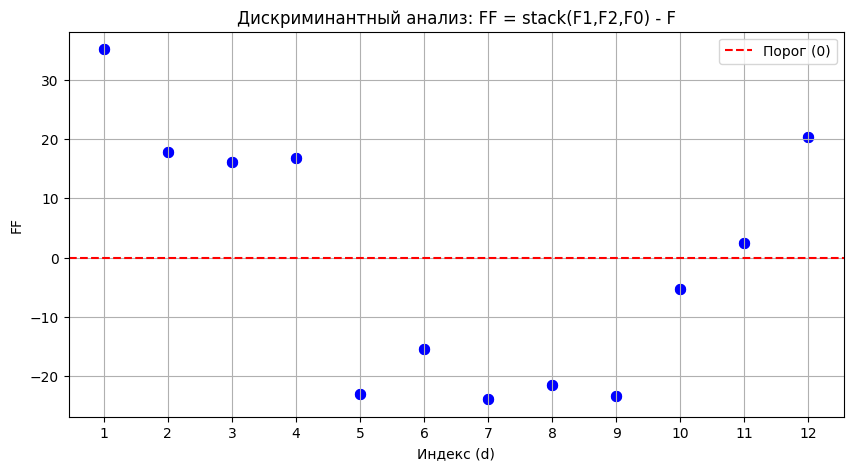

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(d, FF, color='blue', s=50)
plt.scatter(d, FF, color='blue', s=50)
plt.axhline(y=0, color='r', linestyle='--', label='Порог (0)')
plt.title('Дискриминантный анализ: FF = stack(F1,F2,F0) - F')
plt.xlabel('Индекс (d)')
plt.ylabel('FF')
plt.xticks(d)
plt.grid(True)
plt.legend()
plt.show()